# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather" #this URL is provided as the endpoint for retrieving weather data for a specific city.

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # Converting kelvin to celcius
        city_humidity = city_weather["main"]["humidity"] # The different brackets used in the lines are due to the structure of the JSON response returned by the OpenWeatherMap API. This is how you access the wanted variables inside the JSON.
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity, # variables per city are stored as dictionary keys/values inside the city_data empty list created previously.
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
City not found. Skipping...
Processing Record 2 of Set 1 | grand centre
City not found. Skipping...
Processing Record 3 of Set 1 | jamestown
City not found. Skipping...
Processing Record 4 of Set 1 | san jose village
City not found. Skipping...
Processing Record 5 of Set 1 | udachny
City not found. Skipping...
Processing Record 6 of Set 1 | bam
City not found. Skipping...
Processing Record 7 of Set 1 | east london
City not found. Skipping...
Processing Record 8 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 9 of Set 1 | bethel
City not found. Skipping...
Processing Record 10 of Set 1 | saint-pierre
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
City not found. Skipping...
Processing Record 12 of Set 1 | colchani
City not found. Skipping...
Processing Record 13 of Set 1 | kodiak
City not found. Skipping...
Processing Record 14 of Set 1 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [8]:
# Display sample data
city_data_df.head()

""


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

""
City_ID


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [25]:
# Build scatter plot for latitude vs. temperature
actual_date = pd.to_datetime(city_data_df["Date"].iloc[0], unit="s").strftime("%Y-%m-%d") # Converts the Date column into a pandas series of datetime objects, then .iloc selects only the first value (we only need 1 since they're all the same day), and then we format as a string in the desired format.
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75) # Lat values as x axis, Max temp as y axis.

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True) 

# Save the figure
plt.savefig("./output_data/Fig1.png")

# Show plot
plt.show()

KeyError: 'Date'

#### Latitude Vs. Humidity

In [31]:
 #Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Fig2.png")

# Show plot
plt.show()

KeyError: 'Lat'

#### Latitude Vs. Cloudiness

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

KeyError: 'Lat'

#### Latitude vs. Wind Speed Plot

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({actual_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

KeyError: 'Lat'

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def calculate_linear_regression(x_values, y_values):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Create equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    # Return regression results
    return slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq

In [35]:
# Create a DataFrame with the southern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
southern_hemi_df.head()

KeyError: 'Lat'

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

In [37]:
# Linear regression on Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (4, -20), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'northern_hemi_df' is not defined

In [38]:
# Linear regression on Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-30, 5), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [39]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (40, 0), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'northern_hemi_df' is not defined

In [40]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-25, 20), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [41]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'northern_hemi_df' is not defined

In [42]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-20, 7), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

NameError: name 'southern_hemi_df' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


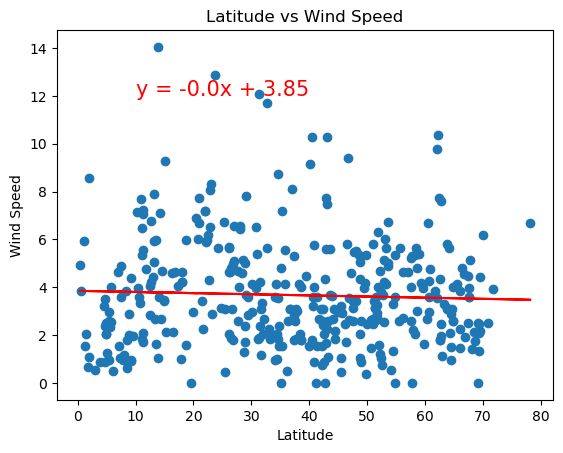

In [21]:
# Northern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (45, 10), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

The r^2-value is: 0.06495869418886388


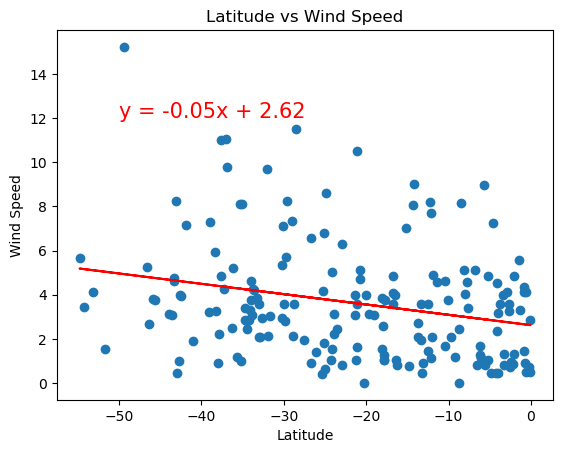

In [22]:
# Southern Hemisphere
slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq = calculate_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Annotate line equation
plt.annotate(line_eq, (-25, 13), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression") # Added a title 

# Show plot
print (f"The r-value is {rvalue}")
plt.show()

**Discussion about the linear relationship:** the lack of a significant linear relationship between Latitude and Wind Speed, with low r-values (.09 and .25) indicating no strong correlation. High dispersion in data at both ends (northern and southern) further supports this conclusion, with the northern correlation being particularly weak. Latitude alone is not a reliable predictor of Wind Speed, making it inadequate to use these models for calculating Wind Speed based on latitude changes. In contrast, the only model found to be adequate for estimating changes based on latitude is the one correlating Max Temp with Latitude.